## WORKSHOP 4: DATA PRE-PROCESSING + PREDICTION

We've spent the first three workshops (and a group assignment) growing our dataset, only to chuck some variables out in this workshop. But it's important!

We grow to:
- gather more interesting data & insights. 

and we reduce to:
- remove redundant variables and others are unimportant. We don't need these for prediction. 
- simplify the predictive models; whereby reducing the likelihood of overfitting. 

In this workshop, we will examine the impact of your group's variables. _Let the games begin!_


## Task 1: Read in files
We will read in two data files:
1) employees_df (which is the file from Workshop 3 and which should now include the variables from your group coursework) 
and 
2) employee_performance.csv which contains our target (dependent) variables.

In [52]:
import pandas as pd

# Reading in the employees_df pickle file
employees_df = pd.read_pickle('./Data/employees_df.pkl')

# Reading in employee_performance.csv into employees_perf
employees_perf = pd.read_csv('./Data/employee_performance.csv' , encoding='latin1')

y_vec=['citations', 'citations_5yr', 'hindex','hindex_5yr', 'i10index','i10index_5yr' ]
# converting to numeric variables
for y in y_vec:
    employees_perf[y] = pd.to_numeric(employees_perf[y]) 

In [53]:
# Explore the contents of employees_perf
for i in employees_perf:
    print(i, employees_perf[i].dtype)

   
employees_perf.describe()

person_id object
citations float64
citations_5yr float64
hindex float64
hindex_5yr float64
i10index float64
i10index_5yr float64


,citations,citations_5yr,hindex,hindex_5yr,i10index,i10index_5yr
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,4498.425926,2311.592593,21.851852,16.759259,41.962963,29.518519
std,8822.368789,4611.691923,20.567796,14.592496,68.068213,47.377146
min,14.000000,13.000000,3.000000,3.000000,0.000000,0.000000
25%,595.750000,408.250000,8.000000,8.000000,8.000000,7.250000
50%,1465.000000,896.500000,15.000000,12.500000,19.500000,15.000000
75%,4288.750000,2136.750000,27.000000,22.750000,40.750000,32.500000
max,56854.000000,30527.000000,120.000000,91.000000,445.000000,320.000000


## Task 2: Variables with missing values
Because some employees did not input a `personal_summary`, some of the missing values in the variables derived from the summary took a 0 value. In this task, we will distinguish between missing values and true 0 values. To do this, we will loop through the variables derived from personal_summary, listed below, and replace 0's with np.nan in the cases (rows) where summary_length = 0. 

The variables we derived in class are as follows, but you may have generated more in your group coursework.
- `summary_length`
- `summary_positivity` 
- `adjective_positivity`
- `dept_similarity`
- `outdept_similarity`
- `betweenness_centrality`
- `degree_centrality`

<hr>
*Hint*: You can use the function `replace`, which you can read about here
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

or, you can use a variation of the following code, in which I'm generating a df with missing value in the last row of column A.
`
##### generating the DataFrame
d = {'A' : pd.Series(['a', 'b', 'c'], index=[0, 1, 2]), 'B' : pd.Series(['a', 'b', 'c', 'd'], index=[0, 1, 2, 3])}
df = pd.DataFrame(d)

##### checking that the last row is nan
print(df.loc[4,'A'])

##### replacing the last row in A with 0 and printing result
df.loc[3,'A'] = 0
print(df.loc[4,'A'])
`

In [54]:
import numpy as np
# YOUR CODE GOES HERE
target_columns = ["summary_length",
                "summary_positivity",
                "adjective_positivity",
                "dept_similarity",
                "outdept_similarity",
                "betweenness_centrality",
                "degree_centrality"]

mask = employees_df['summary_length'] == 0
employees_df.loc[mask, target_columns] = employees_df.loc[mask, target_columns].replace(0, np.nan)

## Task 3: K-NN to impute missing X values

There are a number of different ways for dealing with missing variables. The simplest is to impute numeric variables with mean or median values and categorical variables with the mode. But we'll try to do it a little bit better. 

In this task, we will impute using K-nearest neighbours. We will use the module `knn_impute`, which will impute the missing values in the columns - `summary_length`, `summary_positivity` , `adjective_positivity`,  `dept_similarity`,  `outdept_similarity`,  `betweenness_centrality`, `degree_centrality`.


Let's assume that people will have the same summary if they have the same attributes across the following categories, and use these features for K-NN:
 1. department
 2. gender
 3. ethicity
 4. seniority
 5. tenure_track

We'll will use 5 neighbours (`k`= 5) for our imputation (but you can tune this after you run the OLS, to improve prediction results). 

There is one caveat. `seniority` and `tenure_track` are both categorical variables (although they take on numeric values). In order for the k-NN algorithm to treat them as categorical, let's replace the numeric variables with a string value. This is one way to do it:

`seniority` takes on a value from 1 to 4. Let's replace these with level1, level2, level3, level4. 
`tenure_track` takes on a value of 1 or 0. Let's replace these with `yes` and `no` accordingly.


Once you are ready to impute, you will need to loop through each of the columns with missing values (from Task 2), and run K-NN to fill in the missing values. 

<hr>

The following link gives a detailed example of how to use KNN:
https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637


In [55]:
import knn_impute

# First let's convert the numeric values in seniority and tenure_track to strings. 
l1 = employees_df['seniority'] == 1
l2 = employees_df['seniority'] == 2
l3 = employees_df['seniority'] == 3
l4 = employees_df['seniority'] == 4
employees_df.loc[l1, 'seniority'] = employees_df.loc[l1, 'seniority'].replace(1, 'Level1')
employees_df.loc[l2, 'seniority'] = employees_df.loc[l2, 'seniority'].replace(2, 'Level2')
employees_df.loc[l3, 'seniority'] = employees_df.loc[l3, 'seniority'].replace(3, 'Level3')
employees_df.loc[l4, 'seniority'] = employees_df.loc[l4, 'seniority'].replace(4, 'Level4')

tenured = employees_df['tenure_track'] == 1
not_tenured = employees_df['tenure_track'] == 0
employees_df.loc[tenured, 'tenure_track'] = employees_df.loc[tenured, 'tenure_track'].replace(1, 'yes')
employees_df.loc[not_tenured, 'tenure_track'] = employees_df.loc[not_tenured, 'tenure_track'].replace(0, 'no')


# Running K-NN with k_neighbours = 5
features = ["department",
            "gender",
            "ethnicity",
            "seniority",
            "tenure_track"]
feature_df = employees_df[features].copy()

# Looping through target_columns with missing values.
for target in target_columns:
    target_values = employees_df[target]
    employees_df[target] = knn_impute.knn_impute(target_values, feature_df, k_neighbors=5)

#employees_df.describe(include='all')    

## Task 4: Dealing with missing y values

In our dataset, we have missing X and y values, where y values represent the dependent (target) variable. It is quite important to keep the missing y cases during imputation because:
1) The value of the missing y (be it positive, negative or zero) will not influence the imputation of missing X's.
2) Cases where y is missing but x is present will add more data (and value) to the imputation.

After the imputation (done in task 3), we can delete missing y's. We will do this in the following steps:

1) First, we will make a copy of employees_df, and keep only the (independent) variables that are interesting for our analysis. These are some of the variables we created in the workshops and ALL of the variables you created in your groupwork. 

2) Next, we will merge employees_copy and employees_perf, creating a new DataFrame `employees_final`. We will use `employees_final` for the rest of our analysis.

3) Finally, we will drop all missing rows in `employees_final` with missing values for hindex, which will be our dependent (target) variable for the analysis. 
 


<hr>
If you would like to read more on dealing with missing X and y values: https://onlinelibrary.wiley.com/doi/full/10.1111/j.1467-9531.2007.00180.x



### Task 4.1: Create a copy of employees_df
First, we'll create a copy of `employees_df`, named `employees_copy`
Then, we will keep the following columns
'person_id'
'title_clean'
'department'
'colleagues'
'summary_length'
'summary_positivity'
'adjective_positivity'
'gender'
'ethnicity'
'dept_similarity'
'outdept_similarity'
'betweenness_centrality'
'degree_centrality'
'tenure_track'
'seniority'

<hr>
for more on copying a DataFrame:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html

In [56]:
# Creating a list of columns to keep (or columns to remove)
columns2keep = ['person_id','title_clean', 'department', 'colleagues','summary_length', 'summary_positivity', 'adjective_positivity', 'gender', 'ethnicity','dept_similarity','outdept_similarity','betweenness_centrality','degree_centrality','tenure_track','seniority']

#Creating a copy with only the relevant columns
employees_copy = employees_df[columns2keep]

### Task 4.2: Merge employees_copy and employees_perf 

In this task, we will create a new DataFrame, `employees_final`, which contains all the rows in `employees_copy` and `employees_perf`, merged by `person_id`.  

<hr>
for more on combining DataFrames: https://pandas.pydata.org/pandas-docs/stable/merging.html


In [57]:
# YOUR CODE GOES HERE

print(employees_copy.shape)
print(employees_perf.shape)
employees_final = employees_copy.merge(employees_perf, on='person_id')
print(employees_final.shape)

(110, 15)
(83, 7)
(81, 21)


### Task 4.3 [_optional_]: Exploring missing y's

Let's assume that our dependent variable (y) is `hindex`. In this task, we will explore missing y's by tabulating the percentage of missing values for each unique entry in `title_clean`. 

Is there a trend? Do we have to adjust our hypotheses once the missing y's are deleted? 


In [58]:
# YOUR CODE GOES HERE
print(employees_final.shape)
unique_title_clean = employees_final['title_clean'].unique()
for title in unique_title_clean:
    print(title)
    hindex_title = employees_final.loc[employees_final['title_clean']==title, 'hindex']
    missing_percentage = 100 * hindex_title.isnull().sum() / hindex_title.shape[0]
    print('missing percentage :', missing_percentage)

(81, 21)
Professor
missing percentage : 27.5862068966
Associate Professor
missing percentage : 11.1111111111
Assistant Professor
missing percentage : 50.0
Research Associate
missing percentage : 58.3333333333
Principal Teaching Fellow
missing percentage : 50.0


### Task 4.4: Dropping missing y's
In this task, we will drop/delete all rows in `employees_perf` that contain missing y's

In [59]:
# YOUR CODE GOES HERE
employees_final = employees_final[~employees_final['hindex'].isnull()]
print(employees_final.shape)

(53, 21)


### Task 5: Detecting Sources of Multicollinearity
The explanatory variables of interest are ones you generated in your group assignment and the following: 
 'department',
 'colleagues',
 'summary_length',
 'summary_positivity',
 'adjective_positivity',
 'gender',
 'ethnicity',
 'dept_similarity',
 'outdept_similarity',
 'betweenness_centrality',
 'degree_centrality',
 'tenure_track',
 'seniority'

We will explore (potential) sources of collinearity in two ways. 
- First, we will use the variance inflation factor (VIF). 
- Next, we will print out a correlation heatmap of all the dependent variables. 

**_Note_**: `department`,`gender`,`ethnicity`, `tenure_track` and `seniority` are categorical variables. Before running the VIF, you will first need to convert these categorical variables into dummy/indicator variables. Then, for each group, you will include all but one of the indicator variables, as the third can be inferred. For example, if you include `female` and `male` then you can exclude `neutral`.





In [60]:
#employees_df.describe(include=['O'])

# YOUR CODE FOR VIF goes here
from statsmodels.stats.outliers_influence import variance_inflation_factor


categorical_vars = ['department', 'gender', 'ethnicity', 'tenure_track', 'seniority']
numeric_vars = ['colleagues', 'summary_length', 'summary_positivity','adjective_positivity', 'dept_similarity','outdept_similarity','betweenness_centrality','degree_centrality']

#converting categorical variables to dummy variables
employees_final2 = pd.get_dummies(employees_final[categorical_vars], drop_first=True)

# adding numeric vars to employees_final2
employees_final2[numeric_vars]=employees_final[numeric_vars]


# Running VIF
for i in range(employees_final2.shape[1]):
    vif = variance_inflation_factor(employees_final2.values, i)
    print(employees_final2.columns[i],':',vif)




department_Department of Innovation and Entrepreneurship : 54.869826173
department_Department of Management : 70.9185973927
gender_male : 2.26380145293
gender_neutral : 2.09097852631
ethnicity_GreaterAfrican : 1.62216261185
ethnicity_GreaterEuropean : 1.95316128025
tenure_track_yes : 6.53216711877
seniority_Level2 : 12.2471674512
seniority_Level3 : 15.9830259205
seniority_Level4 : 19.9941776585
colleagues : 724.284310914
summary_length : 1.97695036537
summary_positivity : 1.80977056302
adjective_positivity : 1.7133706942
dept_similarity : 22.9130268738
outdept_similarity : 10.7002298099
betweenness_centrality : 12.4037572745
degree_centrality : 33.2757664556


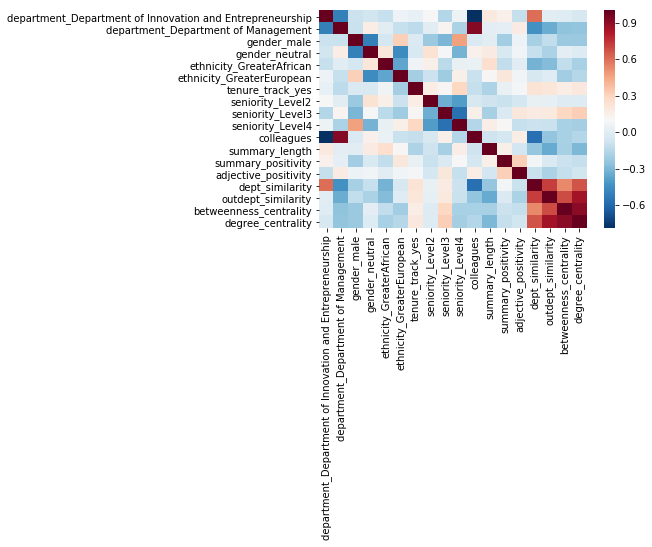

In [61]:
# YOUR CODE FOR CORRELATION HEATMAP GOES HERE
import matplotlib.pyplot as plt
import seaborn as sns
corr_df = employees_final2.corr()
sns.heatmap(corr_df, cmap='RdBu_r')
plt.show()

## TASK 6: Random Forest Regression
Random forest regression uses an ensemble of regression trees to overcome overfitting. It works by "growing" a number of trees. Each tree is grown using only a subset "m" of variables out of all the explanatory variables, and these are random (with replacement). The importance of a variable "x" is simply the average of the predictions from all trees. 

As a default starting point, it is suggested to set the value of "m" (max_features) to be a third of the total number of explanatory variables. 


In [62]:
# Importing the RF regression model and the train_test_split module.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# adding dep_var to employees_final2
employees_final2['hindex']=employees_final['hindex']

df = employees_final2.copy()

X=['department_Department of Innovation and Entrepreneurship',
 'department_Department of Management',
 'gender_male',
 'gender_neutral',
 'ethnicity_GreaterAfrican',
 'ethnicity_GreaterEuropean',
 'tenure_track_yes',
 'seniority_Level2',
 'seniority_Level3',
 'seniority_Level4',
 'colleagues',
 'summary_length',
 'summary_positivity',
 'adjective_positivity',
 'dept_similarity',
 'outdept_similarity',
 'betweenness_centrality',
 'degree_centrality']

# Splitting the data into training and testing sets
#train_X, test_X, train_y, test_y = train_test_split(df[X], df['hindex'], test_size = 0.20, random_state = 42)


# Training the model
# YOUR CODE GOES HERE
rfr = RandomForestRegressor(10, max_features = len(X)//3)
#rfr.fit(train_X, train_y)
rfr.fit(df[X], df['hindex'])


# Calculating the absolute errors as the absolute difference between predicted_y and test_y
#predicted_y = rfr.predict(test_X) # YOUR CODE GOES HERE
#errors = np.abs(test_y - predicted_y)# YOUR CODE GOES HERE


# Calculating the accuracy as 100- mean absolute percentage error (MAPE)
#mape = 100 * (errors / test_y)
#accuracy = 100 - np.mean(mape)
#print(' The accuracy of the random forest:', round(accuracy, 2), '%.')




RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Task 6.1: Feature Selection
Visualize variable importance by first sorting the variables from most important to least. Optionally, you can also output results as a vertical bar chart.  

**_How do your variables fare?_**

<hr>
_Hint_ you can use `rf.feature_importances_` 


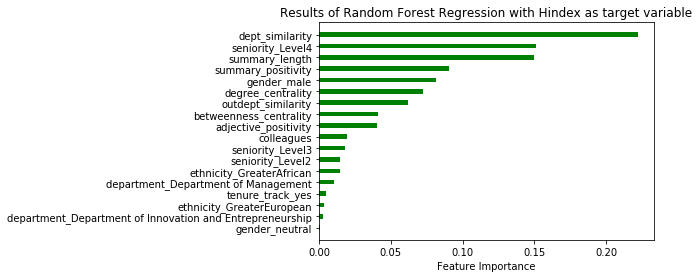

In [63]:
%matplotlib inline

rfr.feature_importances_
# Sorting features by their score
features, importances = zip(*sorted(zip(X, rfr.feature_importances_), key=lambda x: x[1]))

# Printing out the results 
#for f, i in zip(features, importances):
#    print(f, i)

# Creating pos, a list containing indexes of unknown_by_yr
yPos = range(len(features))
       
# Plotting the horizontal bar chart
plt.barh(yPos,  importances,  height =0.4, color='green') 

# Setting xticks to have the same `pos` as bars 
plt.yticks(yPos, features)

# Setting xlabel
plt.xlabel('Feature Importance')

#  Setting a title, and axes labels
plt.title('Results of Random Forest Regression with Hindex as target variable')



In [64]:
#Tuning to remove High VIF

# YOUR CODE GOES HERE

def remove_all_high_VIF(df, predictors, threshold=10):        
    columns = predictors
    df = df[columns].copy()
    
    dropped = True
    while dropped:
        dropped = False
        vif_vals = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]        
        max_vif = max(vif_vals)
        if max_vif > threshold:
            max_vif_index = vif_vals.index(max_vif)
            print('Dropped:',columns[max_vif_index],max_vif)
            del columns[max_vif_index]
            df = df[columns]
            dropped = True

    predictors = columns
    return predictors

#print(X)
#X = remove_all_high_VIF(df, X)
#print(X)


## TASK 7: REGRESSION MODEL 
In this task, we will run two regression models. One with all the variables that were used in the Random Forest regression and a second with a subset of these variables that were deemed "important". 

There is one caveat. Some of our explanatory variables belong in groups. Namely, these are ['department', 'gender', 'ethnicity', 'tenure_track', 'seniority'], that we converted into dummy variables. In cases like this, if one variable is "important" and enters into the regression, then others belonging to the same group should also enter. We will use the following steps:

1) Create a variable, "group_number" which identifies groups of variables. This variable will uniquely identify each numeric variable, and will be repeated across groups. For example, if you have the variables ['degree_centrality', 'gender_female', 'gender_male'], the group_number will look like this: [1, 2, 2] 

2) Create a list (X_nb) of important variables, making sure we include all variables in a group.    

3) Standardize all numeric variables.

4) Run two regression models. One with all variables, and one with only important variables. How does their performance vary?



### TASK 7.1: Create group variable
Generate a dictionary, `group_number` which identifies groups of variables. The keys will be all the X variables that entered into the Random Forest regression. The values will be the group number. 

The dictionary values will uniquely identify each numeric variable, and will be repeated across groups. For example, it will look like this {`degree_centrality`: 1 `gender_female`:2, `gender_male`:3}, if you only had the three variables. 


In [65]:

# Finding all dummified variables 
var_name = X
var_name2=[]
for v in var_name:
    var_name2.append(v.split("_")[0])
    
# Creating a group dictionary
groups = list(np.unique(var_name2))
group_number = {}
for i in range(len(var_name2)):
    v2 = var_name2[i]
    v1 = var_name[i]
    group_number[v1] = groups.index(v2)
    
print(group_number)


{'department_Department of Innovation and Entrepreneurship': 4, 'department_Department of Management': 4, 'gender_male': 7, 'gender_neutral': 7, 'ethnicity_GreaterAfrican': 6, 'ethnicity_GreaterEuropean': 6, 'tenure_track_yes': 11, 'seniority_Level2': 9, 'seniority_Level3': 9, 'seniority_Level4': 9, 'colleagues': 2, 'summary_length': 10, 'summary_positivity': 10, 'adjective_positivity': 0, 'dept_similarity': 5, 'outdept_similarity': 8, 'betweenness_centrality': 1, 'degree_centrality': 3}


### TASK 7.2 Create a list (X_nb) of important variables

In this task, we will generate a new list of features (`X_nb`). This list will contain all variables from the Random Forest regression that have an importance score >= 0.15 (you can play with this threshold), as well as all group members of important variables.

In [66]:
# Lets set the threshold as 0.1, including all variables with an importance value greater than or equal to this threshold
thresh = 0.1

# Sorting features by their score
features, importances = zip(*sorted(zip(X, rfr.feature_importances_), key=lambda x: x[1]))

# Intializing X_nb
X_nb =[]

# Looping through and adding relevant variables
for f, i in zip(features, importances):
    if i >= thresh:
        grp = group_number[f]
        X_nb.extend([k for k,v in group_number.items() if v == grp])
    

print(X_nb)

['summary_length', 'summary_positivity', 'seniority_Level2', 'seniority_Level3', 'seniority_Level4', 'dept_similarity']


### TASK 7.3: Standardize numeric variables
You can do this in one of two ways:

- you can standardize by subtracting the mean and dividing by standard deviation(i.e, x-mean(col)/std(col))
- or you can import and use the StandardScaler module. Here's how StandardScaler works.

`
from sklearn.preprocessing import StandardScaler

data = [[0, 0, 2, 3], [4, 1, 0, 0], [1, 1, 1, 1], [2, 1, 1, 1]]
data_transformed= StandardScaler().fit_transform(data)
print(data_transformed)
`



In [67]:
# Standardizing only the numeric columns
for col in df:
    if col in numeric_vars:
        x = df[col]
        x = (x - np.mean(x)) / np.std(x)
        df[col]=x

### 7.4  Run a regression model
Since we are using hindex as our target variable, we will run an OLS regression. However, if you were to try citations instead, then a Poisson or a Negative Binomial regression will be more appropriate, as those are more suited to count variables.

In this task, run two regression models:
 
    1) Using all X values (call this `model`)
    2) Using only X_nb (call this `model_trunc`)

What is the the difference in R-Squared between the two models? What is the difference in mean-squared error (MSE) of predicted-y versus actual y for the testing sample?

Usually (but not always) using more variables will lead to overfitting, and we would expect to see a larger MSE. 


<hr> 
I will use the OLS module from statsmodels package. It works like this:
`
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

train_X, test_X, train_y, test_y = train_test_split(df[X], df['hindex'], test_size = 0.20, random_state = 42)
model = sm.OLS(train_y, train_X).fit()

y_hat = model.predict(test_X) # make the predictions by the model
mse_full =  mean_squared_error(test_y, y_hat) # check the mean-squared-error


`

you can also look at the model output like this:
`model.summary()`


In [68]:
## TASK 8: Running OLS REGRESSION

# Regression using all variables
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Split into training and test sample
train_X, test_X, train_y, test_y = train_test_split(df[X], df['hindex'], test_size = 0.20, random_state = 42)

# fit the model onto the training sample
model = sm.OLS(train_y, train_X).fit()
y_hat = model.predict(test_X) # make the predictions by the model
mse_full =  mean_squared_error(test_y, y_hat)


# Print out the statistics
model.summary()


# Regression using important variables
train_X, test_X, train_y, test_y = train_test_split(df[X_nb], df['hindex'], test_size = 0.20, random_state = 42)

model_trunc = sm.OLS(train_y, train_X).fit()
y_hat_trunc = model_trunc.predict(test_X) # make the predictions by the model
mse_trunc =  mean_squared_error(test_y, y_hat_trunc)

print("R2 for the full model is:",  model.rsquared)
print("MSE for the full model is:",  mse_full)

print("R2 for the truncated model is:", model_trunc.rsquared)
print("MSE for the truncated model is:",  mse_trunc)


R2 for the full model is: 0.652270127103
MSE for the full model is: 235.631267287
R2 for the truncated model is: 0.661744352544
MSE for the truncated model is: 202.899920004


### 7.5 [_Optional_] Plotting Impact of Important Features on Performance

In this task, plot out the important features  

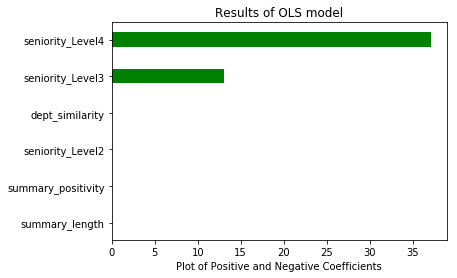

In [69]:
coeffs = model_trunc.params
pvals = model_trunc.pvalues

# Replacing coeff by 0 if coefficient is negative
for i in range(len(pvals)):
    if pvals[i]>=0.1:
        coeffs[i]=0

        
# # Sorting X_trunc by coefficient size

positive_x, positive_coeff = [], []
negative_x, negative_coeff = [], []
zero_x, zero_coeff = [], []

for i, imp in enumerate(coeffs):
    if imp > 0:
        positive_coeff.append(imp)
        positive_x.append(X_nb[i])
    else:
        negative_coeff.append(imp)
        negative_x.append(X_nb[i])


positive_x, positive_coeff = zip(*sorted(zip(positive_x, positive_coeff), key=lambda x: x[1]))   
negative_x, negative_coeff = zip(*sorted(zip(negative_x, negative_coeff), key=lambda x: x[1]))


# Creating pos 
yPos_negative = list(range(len(negative_x)))
yPos_positive = list(range(len(negative_x), len(X_nb)))

# Plotting the horizontal bar chart
plt.barh(yPos_negative,  negative_coeff,  height =0.4, color='red') 
plt.barh(yPos_positive,  positive_coeff,  height =0.4, color='green') 

# Setting xticks to have the same `pos` as bars 
plt.yticks(yPos_negative + yPos_positive, negative_x + positive_x)

# Setting xlabel
plt.xlabel('Plot of Positive and Negative Coefficients')

#  Setting a title, and axes labels
plt.title('Results of OLS model')       


## TASK 8: Tuning

Some things to try:
1) Change "k" in knn    
2) Remove variables with high "VIF"
3) Remove variables that are highly correlated to the ones you've generated
4) Change the parameters of the Random Forest Regression
5) Change the threshold for feature selection

How do the above impact the R2 and MSE of the OLS regression (You want R2 to go up and MSE to decrease).